In [6]:
# CELL A - basic setup (run once)
!pip install --quiet pandas openpyxl

import os
os.makedirs('data/raw', exist_ok=True)
os.makedirs('data/cleaned', exist_ok=True)
os.makedirs('reports', exist_ok=True)
print("Setup ready. Folders created: data/raw, data/cleaned, reports")


Setup ready. Folders created: data/raw, data/cleaned, reports


In [7]:
# CELL B - Upload the Excel file from your computer
from google.colab import files
print("Select and upload your Excel file (apple_stock_10years_daywise.xlsx).")
uploaded = files.upload()
# This will place the file in the current Colab working directory
print("Uploaded files:", list(uploaded.keys()))


Select and upload your Excel file (apple_stock_10years_daywise.xlsx).


Saving kaggle.json to kaggle.json
Uploaded files: ['kaggle.json']


In [8]:
# CELL 3 - download dataset from Kaggle (example slug)
# Replace slug if you choose different dataset on Kaggle
!kaggle datasets download -d yousufshah/10-year-daily-stock-data-of-apple-2015-to-2025 -p data/raw --unzip

# list files we downloaded
!ls -lah data/raw


Dataset URL: https://www.kaggle.com/datasets/yousufshah/10-year-daily-stock-data-of-apple-2015-to-2025
License(s): apache-2.0
  0% 0.00/114k [00:00<?, ?B/s]
100% 114k/114k [00:00<00:00, 357MB/s]
total 124K
drwxr-xr-x 2 root root 4.0K Oct 11 15:53 .
drwxr-xr-x 4 root root 4.0K Oct 11 15:17 ..
-rw-r--r-- 1 root root 116K Oct 11 15:53 apple_stock_10years_daywise.xlsx


In [9]:
# 📦 Libraries install karna (agar pehle nahi ki)
!pip install pandas matplotlib openpyxl

# 📥 Import karna
import pandas as pd
import matplotlib.pyplot as plt


In [10]:
# 📁 File ka path
file_path = "data/raw/apple_stock_10years_daywise.xlsx"

# 📊 File read karna
df = pd.read_excel(file_path)

# 👀 First 5 rows dekhna
df.head()


,Date,Close,High,Low,Open,Volume
0,2015-04-13,28.33,28.71,28.28,28.67,145460400
1,2015-04-14,28.21,28.43,28.12,28.36,102098400
2,2015-04-15,28.31,28.39,28.14,28.23,115881600
3,2015-04-16,28.18,28.38,28.16,28.20,113476000
4,2015-04-17,27.86,28.17,27.80,28.04,207828000


In [11]:
# 📅 Columns aur data types check karo
print(df.info())

# 📈 Data ka shape (rows x columns)
print("Shape of dataset:", df.shape)

# 📊 Summary statistics
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2517 non-null   datetime64[ns]
 1   Close   2517 non-null   float64       
 2   High    2517 non-null   float64       
 3   Low     2517 non-null   float64       
 4   Open    2517 non-null   float64       
 5   Volume  2517 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 118.1 KB
None
Shape of dataset: (2517, 6)
                                Date        Close         High          Low  \
count                           2517  2517.000000  2517.000000  2517.000000   
mean   2020-04-09 06:31:19.380214272    99.638741   100.633917    98.532292   
min              2015-04-13 00:00:00    20.670000    20.980000    20.480000   
25%              2017-10-09 00:00:00    36.890000    37.380000    36.540000   
50%              2020-04-09 00:00:00    75.

In [12]:
# 🔍 Missing values check karo
print(df.isnull().sum())


Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


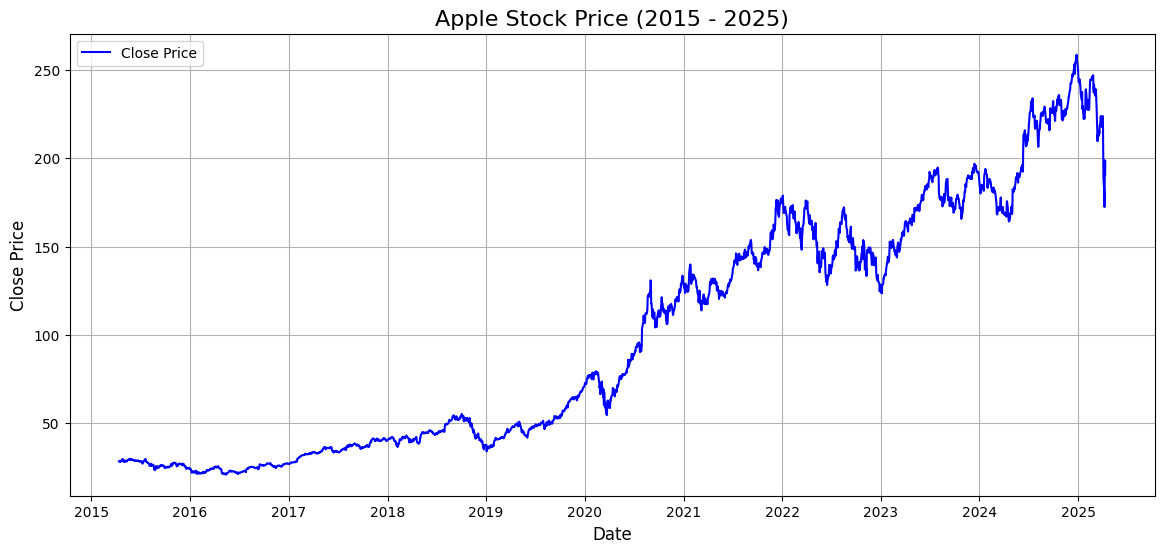

In [13]:
import matplotlib.pyplot as plt

# 📈 Close price over time
plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.title('Apple Stock Price (2015 - 2025)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


In [14]:
# Highest stock price
max_price = df['Close'].max()
max_date = df[df['Close'] == max_price]['Date'].iloc[0]

# Lowest stock price
min_price = df['Close'].min()
min_date = df[df['Close'] == min_price]['Date'].iloc[0]

print("📈 Highest Close Price:", max_price, "on", max_date)
print("📉 Lowest Close Price:", min_price, "on", min_date)


📈 Highest Close Price: 258.74 on 2024-12-26 00:00:00
📉 Lowest Close Price: 20.67 on 2016-05-12 00:00:00


In [15]:
# Average close price
avg_price = df['Close'].mean()
print("📊 Average Close Price:", round(avg_price, 2))


📊 Average Close Price: 99.64


In [16]:
df.to_csv('apple_stock_cleaned.csv', index=False)
